In [1]:
from skimage import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn import svm
import pandas as pd
import itertools

In [2]:
collection = io.imread_collection('E:/Landsat8/*.tif')

In [3]:
BB = collection[0]
BG = collection[1]
BR = collection[3]

In [4]:
NBR = (BR - np.min(BR))/(np.max(BR) - np.min(BR))
NBG = (BG - np.min(BG))/(np.max(BG) - np.min(BG))
NBB = (BB - np.min(BB))/(np.max(BB) - np.min(BB))

In [5]:
rgb = np.stack([NBR, NBG, NBB], axis=2)

In [6]:
width = collection[0].shape[0]
height = collection[0].shape[1]

In [7]:
width

998

In [8]:
height

998

In [9]:
all_images = io.concatenate_images(collection).transpose()
all_image_reshape = all_images.reshape((height*width, len(collection)))

In [10]:
all_image_reshape

array([[ -64,  386, 3311,  163, 1695,  844],
       [ -57,  329, 2843,  191, 1517,  794],
       [ -40,  429, 2769,  236, 1772,  955],
       ...,
       [ 456,  701, 1649,  796,  921,  531],
       [ 311,  635, 2440,  631, 1350,  779],
       [  70,  452, 2843,  342, 1276,  668]], dtype=int16)

In [11]:
class_num = 4

In [12]:
sample_num = 10

In [13]:
columns = ['Band{}'.format(i+1) for i in range(len(collection))]
classes_df = pd.DataFrame(columns =columns )

In [14]:
columns

['Band1', 'Band2', 'Band3', 'Band4', 'Band5', 'Band6']

In [15]:
classes_df

,Band1,Band2,Band3,Band4,Band5,Band6


In [16]:
targets = [[i+1]*sample_num for i in range(class_num)]
merged = list(itertools.chain(*targets))
classes_df['Target'] = merged

In [17]:
targets

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]]

In [18]:
merged

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [19]:
classes_df

,Band1,Band2,Band3,Band4,Band5,Band6,Target
0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,1
5,NaN,NaN,NaN,NaN,NaN,NaN,1
6,NaN,NaN,NaN,NaN,NaN,NaN,1
7,NaN,NaN,NaN,NaN,NaN,NaN,1
8,NaN,NaN,NaN,NaN,NaN,NaN,1
9,NaN,NaN,NaN,NaN,NaN,NaN,1


In [20]:
i = 0

In [21]:
def mouseclick(event , x , y , flags, param):
    global i
    if event == cv2.EVENT_LBUTTONDOWN:
        if i < class_num * sample_num:
            mylist = []
            for j in collection:
                mylist.append(j[x][y])
            classes_df.iloc[i , 0:len(collection)] = mylist
            i = i+1
            print(classes_df)
        else:
            array = classes_df.values
            X = array[: , 0:len(collection)]
            Y = array[:, len(collection)].astype('int')
            
            clf = svm.SVC(gamma='scale')#Start Classifier
            clf.fit(X,Y)
            pred = clf.predict(all_image_reshape)
            plt.imshow(pred.reshape((height, width)).transpose())
            plt.show()             

   Band1 Band2 Band3 Band4 Band5 Band6  Target
0    -73   415  3343   225  1736   884       1
1    NaN   NaN   NaN   NaN   NaN   NaN       1
2    NaN   NaN   NaN   NaN   NaN   NaN       1
3    NaN   NaN   NaN   NaN   NaN   NaN       1
4    NaN   NaN   NaN   NaN   NaN   NaN       1
5    NaN   NaN   NaN   NaN   NaN   NaN       1
6    NaN   NaN   NaN   NaN   NaN   NaN       1
7    NaN   NaN   NaN   NaN   NaN   NaN       1
8    NaN   NaN   NaN   NaN   NaN   NaN       1
9    NaN   NaN   NaN   NaN   NaN   NaN       1
10   NaN   NaN   NaN   NaN   NaN   NaN       2
11   NaN   NaN   NaN   NaN   NaN   NaN       2
12   NaN   NaN   NaN   NaN   NaN   NaN       2
13   NaN   NaN   NaN   NaN   NaN   NaN       2
14   NaN   NaN   NaN   NaN   NaN   NaN       2
15   NaN   NaN   NaN   NaN   NaN   NaN       2
16   NaN   NaN   NaN   NaN   NaN   NaN       2
17   NaN   NaN   NaN   NaN   NaN   NaN       2
18   NaN   NaN   NaN   NaN   NaN   NaN       2
19   NaN   NaN   NaN   NaN   NaN   NaN       2
20   NaN   Na

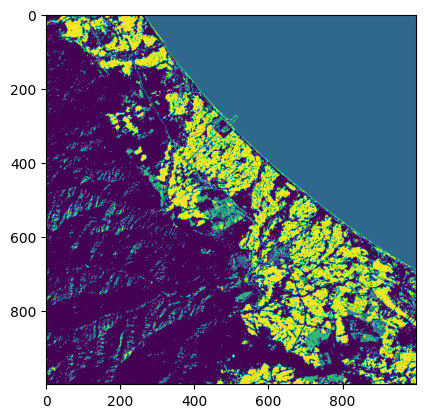

In [ ]:
cv2.namedWindow('mouseClick', cv2.WINDOW_NORMAL)
cv2.setMouseCallback('mouseClick', mouseclick)

while True:
    cv2.imshow('mouseClick', rgb)
    if cv2.waitKey(20) == 27:
        break
        
cv2.destroyAllWindow()